In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
)
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 
# Change the batchsize according to your system RAM
train_batchsize = 16
val_batchsize = 10
 
train_generator = train_datagen.flow_from_directory(
        '/content/drive/My Drive/SKIN_DISEASE_DATASET/train',
        target_size=(224,224),
        batch_size=train_batchsize,
        class_mode='categorical')
 
validation_generator = validation_datagen.flow_from_directory(
        '/content/drive/My Drive/SKIN_DISEASE_DATASET/test',
        target_size=(224,224),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=True)

Found 672 images belonging to 6 classes.
Found 108 images belonging to 6 classes.


In [ ]:
from tensorflow.keras.applications.xception import Xception       # change this
# from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
# from tensorflow.keras.applications.nasnet import NASNetMobile
from tensorflow.keras.applications.inception_v3 import InceptionV3
xcep = Xception(weights='imagenet', include_top=False, input_shape=(224,224, 3)) 

83689472/83683744 [==============================] - 1s 0us/step


In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
 
# Create the model
model1 = models.Sequential()
 
model1.add(xcep)
# Add new layers
model1.add(layers.Flatten())
model1.add(layers.Dense(1024, activation='relu'))
model1.add(layers.BatchNormalization())
model1.add(layers.Dropout(0.5))

model1.add(layers.Dense(512, activation='relu'))
model1.add(layers.BatchNormalization())
model1.add(layers.Dropout(0.5))

model1.add(layers.Dense(6, activation='softmax'))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Model)             (None, 7, 7, 2048)        20861480  
_________________________________________________________________
flatten_1 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              102761472 
_________________________________________________________________
batch_normalization_6 (Batch (None, 1024)              4096      
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               524800    
_________________________________________________________________
batch_normalization_7 (Batch (None, 512)              

In [ ]:
# NasNetMobile model   
model1.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])
# Train the model
history = model1.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)

Epoch 1/30
42/42 [==============================] - 25s 607ms/step - loss: 1.6725 - acc: 0.4554 - val_loss: 1.1628 - val_acc: 0.5833
Epoch 2/30
42/42 [==============================] - 25s 590ms/step - loss: 0.8557 - acc: 0.7083 - val_loss: 0.7855 - val_acc: 0.8241
Epoch 3/30
42/42 [==============================] - 25s 602ms/step - loss: 0.6558 - acc: 0.7857 - val_loss: 0.7463 - val_acc: 0.7130
Epoch 4/30
42/42 [==============================] - 26s 616ms/step - loss: 0.4622 - acc: 0.8482 - val_loss: 0.6424 - val_acc: 0.7870
Epoch 5/30
42/42 [==============================] - 26s 623ms/step - loss: 0.4199 - acc: 0.8452 - val_loss: 0.6077 - val_acc: 0.8241
Epoch 6/30
42/42 [==============================] - 26s 625ms/step - loss: 0.4481 - acc: 0.8705 - val_loss: 0.6835 - val_acc: 0.7870
Epoch 7/30
42/42 [==============================] - 26s 616ms/step - loss: 0.3630 - acc: 0.8824 - val_loss: 0.6256 - val_acc: 0.8056
Epoch 8/30
42/42 [==============================] - 26s 620ms/step - 

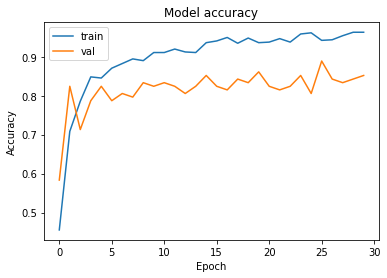

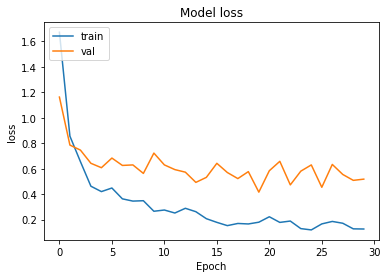

In [ ]:
import matplotlib.pyplot as plt

# training and accuracy value
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train','val'],loc='upper left')
plt.show()

# training and loss value
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(['train','val'],loc='upper left')
plt.show()

In [ ]:
tf.__version__

'2.0.0'